In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [8]:
np.max(train_images)

255

In [9]:
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

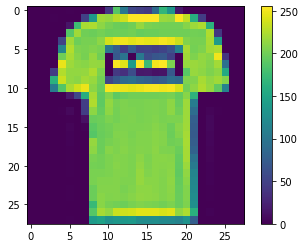

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
train_images=train_images/255.0

In [15]:
test_images=test_images/255.0

In [16]:
np.max(train_images)

1.0

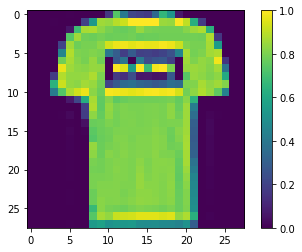

In [17]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [19]:
model = tf.keras.models.Sequential(((
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
)))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4427 - accuracy: 0.8400 - val_loss: 0.3602 - val_accuracy: 0.8752
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2979 - accuracy: 0.8921 - val_loss: 0.2991 - val_accuracy: 0.8903
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2502 - accuracy: 0.9083 - val_loss: 0.2756 - val_accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2185 - accuracy: 0.9178 - val_loss: 0.2711 - val_accuracy: 0.9029
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1913 - accuracy: 0.9276 - val_loss: 0.2556 - val_accuracy: 0.9066
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1679 - accuracy: 0.9367 - val_loss: 0.2643 - val_accuracy: 0.9082
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1476 - accuracy: 0.9440 - val_loss: 0.2600 -

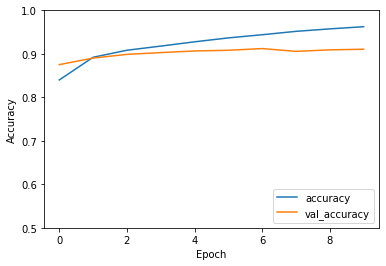

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1)
plt.legend(loc='lower right')

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2963 - accuracy: 0.9106
0.9106000065803528


In [25]:
from sklearn.metrics import accuracy_score

In [26]:
predict_labels = np.argmax(model.predict(test_images), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [27]:
accuracy_score(test_labels, predict_labels)

0.9106

In [28]:
predict_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [29]:
predict = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [30]:
predict

array([[1.70871021e-12, 5.53832493e-15, 5.44050499e-11, ...,
        5.74264902e-07, 2.85357539e-13, 9.99999285e-01],
       [1.03451782e-06, 2.69201546e-18, 9.99996305e-01, ...,
        1.02590314e-16, 4.32225057e-14, 5.19685105e-14],
       [4.59445232e-10, 1.00000000e+00, 1.68627021e-13, ...,
        4.73170161e-19, 2.84996744e-12, 1.03444136e-18],
       ...,
       [4.29373774e-14, 2.62118052e-19, 3.35345467e-12, ...,
        1.03468720e-12, 1.00000000e+00, 4.67398371e-14],
       [1.92587764e-12, 1.00000000e+00, 3.76510845e-12, ...,
        4.40653618e-16, 9.02495580e-14, 1.76973846e-14],
       [1.53134431e-06, 4.64115552e-11, 4.03576109e-07, ...,
        7.89832193e-05, 3.18379971e-05, 1.31745196e-07]], dtype=float32)

In [31]:
predict[0]

array([1.7087102e-12, 5.5383249e-15, 5.4405050e-11, 5.2236639e-12,
       1.4705306e-11, 1.7501065e-07, 3.1829506e-13, 5.7426490e-07,
       2.8535754e-13, 9.9999928e-01], dtype=float32)

In [32]:
np.argmax(predict[0])

9

In [33]:
np.argmax(predict[1])

2

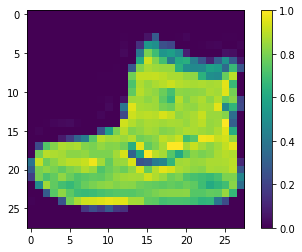

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [35]:
predict = np.argmax(model.predict(test_images[0].reshape(1, 28, 28, -1)))
predict

1/1 [==============================] - 0s 90ms/step


9

In [36]:
categories[predict]

'Ankle boot'